In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\911.csv")
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Details about the features:

lat: String variable, Latitude <br>
lng: String variable, Longitude<br>
desc: String variable,Description of the Emergency call<br>
zip: String variable, Zipcode<br>
title: String variable, Title<br>
timeStamp: String variable, YYYY-MM-DD HH:MM:SS<br>
twp: String variable, Township<br>
addr: String variable, Address<br>
e: String variable, Dummy variable(always set to 1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
data.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [5]:
data.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

##### Analysis and Visualisation

In [6]:
data['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
data['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Text(0, 0.5, ' ')

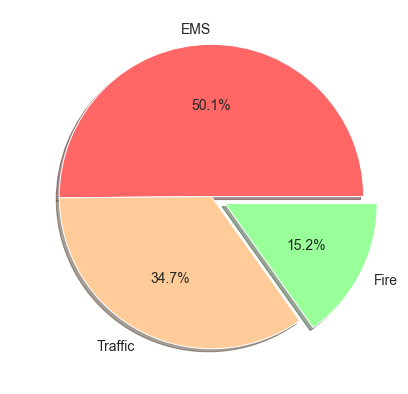

In [30]:
explode = (0, 0, 0.1)
colors = ['#ff6666', '#ffcc99', '#99ff99']
data['reason'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(7,7),explode=explode,colors=colors,textprops={'fontsize': 14}).set_ylabel(" ")

In [8]:
data['reason']=data['title'].apply(lambda x:x.split(': ')[0])
data['sub-reason']=data['title'].apply(lambda x:x.split(':')[1])
data.head() 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub-reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [10]:
data["timeStamp"]=pd.to_datetime(data["timeStamp"])
data["hour"]=data["timeStamp"].apply(lambda x:x.hour)
data["month"]=data["timeStamp"].apply(lambda x:x.month)
data["day of week"]=data["timeStamp"].apply(lambda x:x.dayofweek)
data["date"]=data["timeStamp"].apply(lambda x:x.date())
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub-reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16,12,3,2015-12-10


In [11]:
data["day"]=data["day of week"].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
data['date']=data['timeStamp'].apply(lambda x:x.date())
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub-reason,hour,month,day of week,date,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3,2015-12-10,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16,12,3,2015-12-10,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16,12,3,2015-12-10,Thursday


In [12]:
for i in data.columns:
    print("{}: {}".format(i,data[i].nunique()))

lat: 25949
lng: 25980
desc: 663282
zip: 204
title: 148
timeStamp: 640754
twp: 68
addr: 41292
e: 1
reason: 3
sub-reason: 95
hour: 24
month: 12
day of week: 7
date: 1694
day: 7


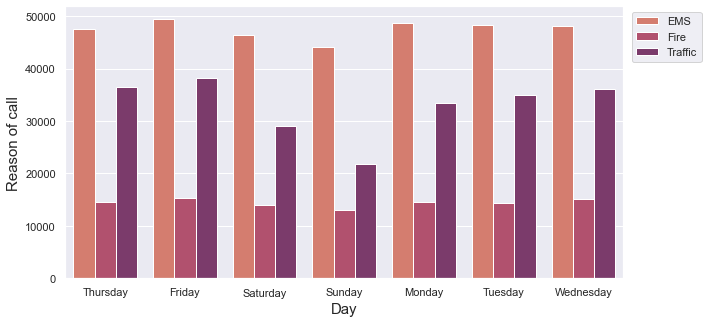

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='day',hue='reason',palette="flare");
plt.legend(bbox_to_anchor=(1.15,1))
plt.xlabel('Day',fontsize=15)
plt.ylabel('Reason of call',fontsize=15)
plt.show()

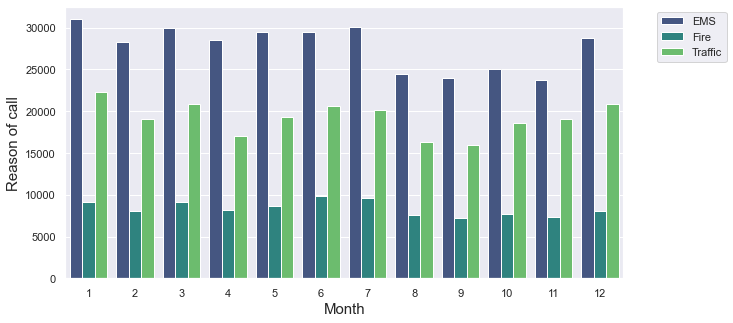

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='month',hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel('Month',fontsize=15)
plt.ylabel('Reason of call',fontsize=15)
plt.show()

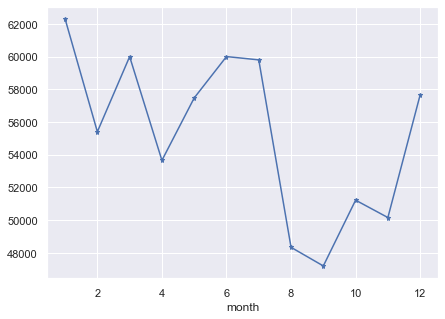

In [16]:
data.groupby(by='month').count()['twp'].plot.line(marker='*',markersize=5,figsize=(7,5));

In [ ]:
plt.figure(frameon=False)
data[data['reason']=='EMS'].groupby(by='date').count().plot(y='twp',figsize=(16,4),title='EMS',color='green')
plt.ylabel("township")
data[data['reason']=='Fire'].groupby(by='date').count().plot(y='twp',figsize=(16,4),title='Fire')
plt.ylabel("township")
data[data['reason']=='Traffic'].groupby(by='date').count().plot(y='twp',figsize=(16,4),title='Traffic',color='red')
plt.ylabel("township")
plt.show()

We can clearly analyse from above visualization that most 911 calls were made due to fire in the month of February in year 2018 and june in year 2020.
Similarly, we can clearly analyse from above visualization that most 911 calls were made due to traffic in the months of February and November in year 2018.

Using heatmap is the best way to visualize the relationship between two features affected by another feature

In [18]:
month_n_day=data.groupby(by=['day','month']).count()['reason'].unstack()
hour_n_day=data.groupby(by=['day','hour']).count()['reason'].unstack()
month_n_day.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


In [19]:
hour_n_day.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


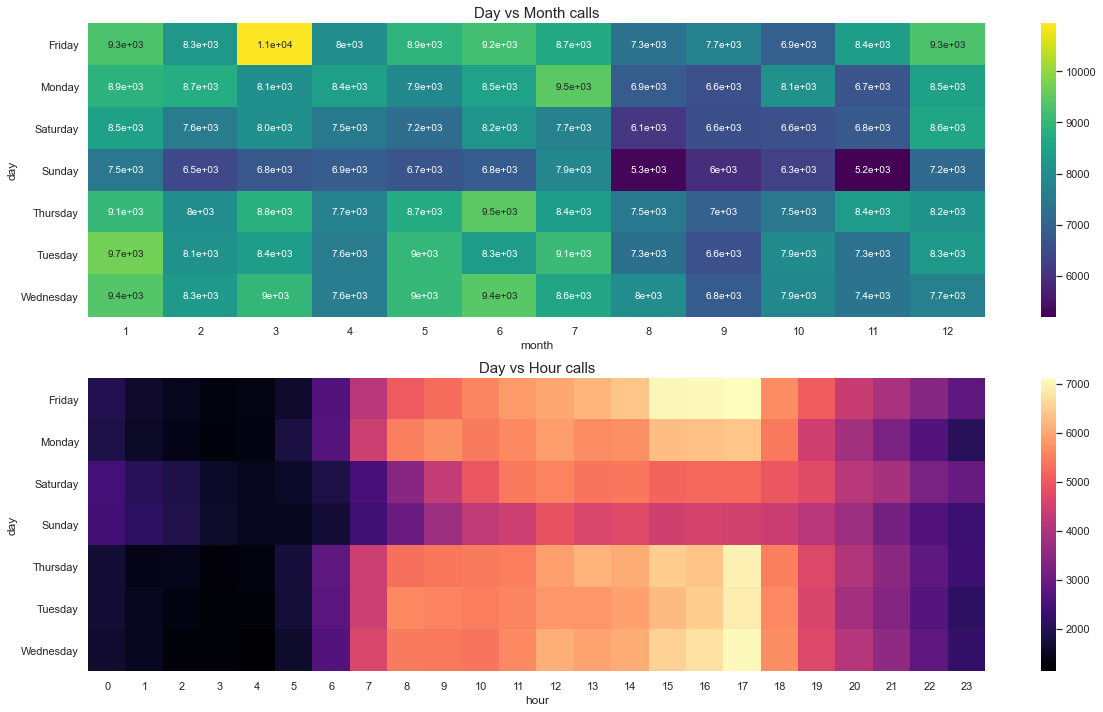

In [20]:
fig, ax=plt.subplots(2,1,figsize=(17,10),edgecolor='blue')
sns.heatmap(month_n_day,ax=ax[0],annot=True,cmap='viridis')
ax[0].set_title('Day vs Month calls',fontsize=15)
sns.heatmap(hour_n_day,ax=ax[1],annot=False,cmap='magma')
ax[1].set_title('Day vs Hour calls',fontsize=15)
plt.tight_layout()

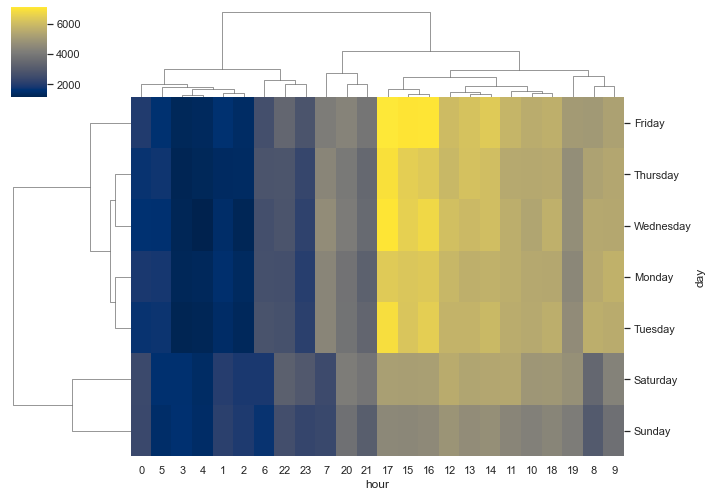

In [21]:
sns.clustermap(hour_n_day,figsize=(10,7),cmap='cividis')

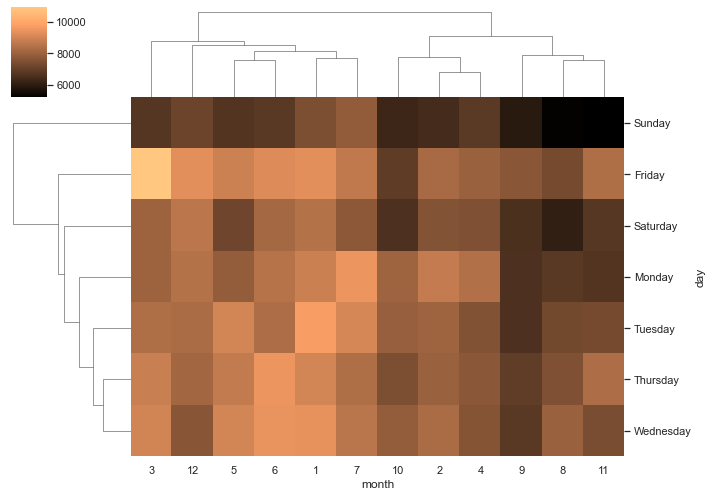

In [22]:
sns.clustermap(month_n_day,figsize=(10,7),cmap='copper')